### 4. مقایسه درآمد افرادی شهری در سال های 1400 و 1401

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def get_total_job_income(df, member_id):
    return df[df['Member_id'] == member_id]['netincome_w_y'].apply(to_int).sum()


def get_total_free_income(df, member_id):
    return df[df['Member_id'] == member_id]['income_s_y'].apply(to_int).sum()


def get_total_subsidy_income(df, member_id):
    return df[df['Member_id'] == member_id]['subsidy'].apply(to_int).sum()


def to_int(num):
    try:
        if type(num) == str:
            num = num.strip()
        return int(num)
    except Exception as e:
        return 0


def get_total_other_income(record):
    total_income = 0

    total_income += to_int(record['income_pension'])
    total_income += to_int(record['income_rent'])
    total_income += to_int(record['income_interest'])
    total_income += to_int(record['income_aid'])
    total_income += to_int(record['income_resale'])
    total_income += to_int(record['income_transfer'])

    return total_income


def get_total_income(df, member_id):
    return df[df['Member_id'] == member_id]['income'].apply(to_int).sum()


def calc_total_person_income(file_name):
    df_job_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S01')

    df_job_income = df_job_income[(~np.isnan(df_job_income['Address'])) & (~np.isnan(df_job_income['member']))]
    df_job_income['Member_id'] = df_job_income.apply(lambda r: str(r['Address']) + '_' + str(int(r['member'])), axis=1)
    df_job_income['income'] = df_job_income.apply(lambda r: get_total_job_income(df_job_income, r['Member_id']), axis=1)
    df_job_income.drop_duplicates(subset=['Member_id'], inplace=True)
    df_job_income = df_job_income[['Member_id', 'income']]

    df_free_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S02')

    df_free_income = df_free_income[(~np.isnan(df_free_income['Address'])) & (~np.isnan(df_free_income['member']))]
    df_free_income['Member_id'] = df_free_income.apply(lambda r: str(r['Address']) + '_' + str(int(r['member'])), axis=1)
    df_free_income['income'] = df_free_income.apply(lambda r: get_total_free_income(df_free_income, r['Member_id']), axis=1)
    df_free_income.drop_duplicates(subset=['Member_id'], inplace=True)
    df_free_income = df_free_income[['Member_id', 'income']]
    
    df_other_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S03')

    df_other_income.fillna(0, inplace=True)
    df_other_income = df_other_income[(~np.isnan(df_other_income['Address'])) & (~np.isnan(df_other_income['member']))]
    df_other_income['Member_id'] = df_other_income.apply(lambda r: str(r['Address']) + '_' + str(int(r['member'])), axis=1)
    df_other_income['income'] = df_other_income.apply(lambda r: get_total_other_income(r), axis=1)
    df_other_income.drop_duplicates(subset=['Member_id'], inplace=True)
    df_other_income = df_other_income[['Member_id', 'income']]
    
    df_subsidy_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S04')

    df_subsidy_income = df_subsidy_income[(~np.isnan(df_subsidy_income['Address'])) & (~np.isnan(df_subsidy_income['member']))]
    df_subsidy_income['Member_id'] = df_subsidy_income.apply(lambda r: str(r['Address']) + '_' + str(int(r['member'])), axis=1)
    df_subsidy_income['income'] = df_subsidy_income.apply(lambda r: get_total_subsidy_income(df_subsidy_income, r['Member_id']), axis=1)
    df_subsidy_income.drop_duplicates(subset=['Member_id'], inplace=True)
    df_subsidy_income = df_subsidy_income[['Member_id', 'income']]

    df_income = pd.concat([df_job_income, df_free_income, df_other_income, df_subsidy_income])
    
    return df_income

In [4]:
U1400 = calc_total_person_income('U1400.xlsx')
U1400_income = U1400.groupby('Member_id').agg({'income': 'sum'})
U1400_income = U1400_income['income'].values

In [5]:
U1401 = calc_total_person_income('U1401.xlsx')
U1401_income = U1401.groupby('Member_id').agg({'income': 'sum'})
U1401_income = U1401_income['income'].values

In [6]:
U1400_income.mean(), U1401_income.mean()

(235215582.0052185, 378516110.72378343)

همان طور که مشاهده می شود، میانگین درآمد افراد شهری در سال 1401 از سال 1400 بسیار بیشتر است اکنون واریانس آنها را بررسی میکنیم

In [7]:
U1400_income.std(), U1401_income.std()

(393554946.75185376, 615398339.4857981)

حالا میتوانیم توزیع میانگین دو سال متوالی رو بر روی دو نمودار جداگانه مشاهده کنیم که به شکل زیر خواهد بود

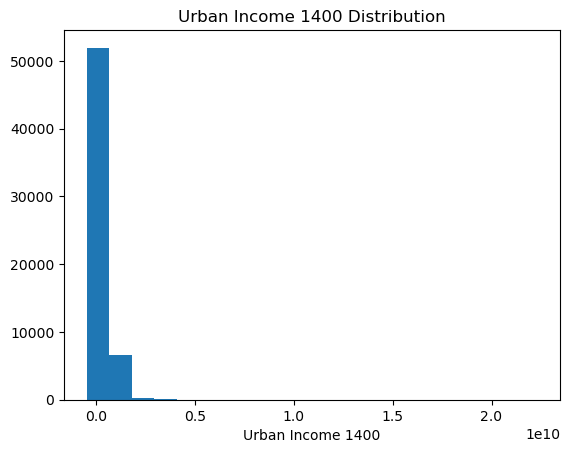

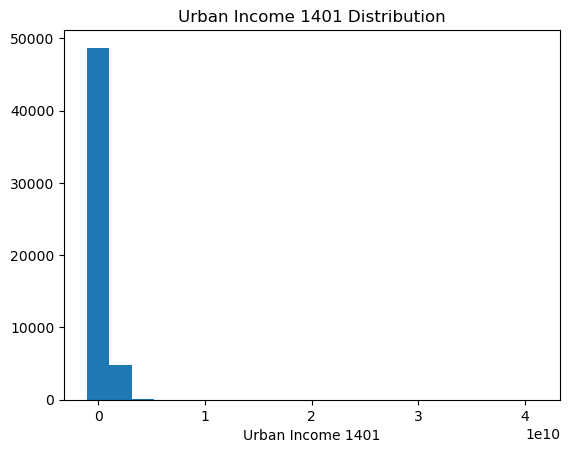

In [8]:
plt.hist(U1400_income, bins=20)
plt.xlabel('Urban Income 1400')
plt.title('Urban Income 1400 Distribution')
plt.show()
plt.hist(U1401_income, bins=20)
plt.xlabel('Urban Income 1401')
plt.title('Urban Income 1401 Distribution')
plt.show()

اکنون نمودار درآمد را برای هر سال جداگانه و زیر یکدیگر رسم می کنیم

C:\Users\a\AppData\Local\Temp\ipykernel_11904\1730996501.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "x" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(U1400_income, np.zeros_like(U1400_income) + 0, 'x', color='blue', marker='o', label='Urban income 1400')
C:\Users\a\AppData\Local\Temp\ipykernel_11904\1730996501.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "x" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(U1401_income, np.zeros_like(U1401_income) + 0, 'x', color='red', marker='o', label='Urban income 1401')


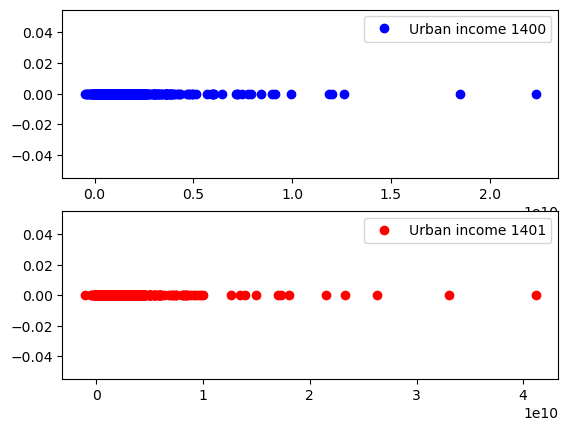

In [17]:
plt.subplot(2, 1, 1)
plt.plot(U1400_income, np.zeros_like(U1400_income) + 0, 'x', color='blue', marker='o', label='Urban income 1400')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(U1401_income, np.zeros_like(U1401_income) + 0, 'x', color='red', marker='o', label='Urban income 1401')
plt.legend()
plt.show()

از روی نمودار هم کمی میتوان مشاهده کرد که درآمد سال 1401 بیشتر از سال 1400 است. اکنون درآمد .واقعی سال 1401 را رسم می کنیم

In [20]:
inflation_1401 =0.465
np.mean(U1400_income), np.mean(U1401_income / (1 + inflation_1401))

(235215582.0052185, 258372771.82510814)

In [23]:
len(U1400_income), len(U1401_income)

(58829, 53697)

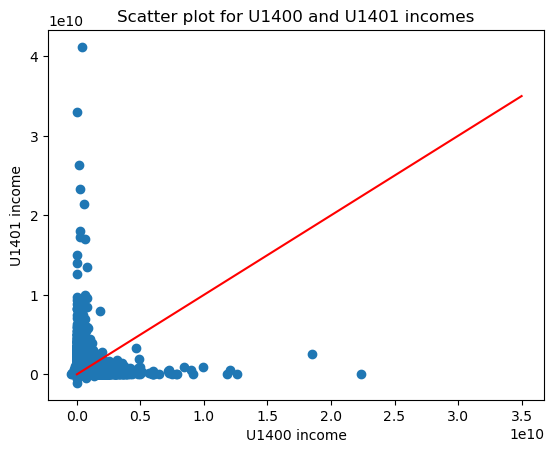

In [44]:
U1400_income_sample = U1400_income[:53697]

plt.scatter(U1400_income_sample, U1401_income)
plt.plot(np.arange(0, 4e10, step=5e9), np.arange(0, 4e10, step=5e9), color='red')
plt.xlabel('U1400 income')
plt.ylabel('U1401 income')
plt.title('Scatter plot for U1400 and U1401 incomes')
plt.show()

طبق مشاهده نمونه های بالای خط نیمساز کمی بیشتر هستند. به همین دلیل باز هم میتوان نتیجه قبلی مبنی بر بیشتر بودن درآمد سال 1401 را تکرار کرد

مشاهده می کنیم با احتساب درآمد سال 1400 به عنوان درآمد حقیقی یک فرد، در سال بعد درآمد حقیقی با توجه نرخ تورم تقریبا برابر با درآمد سال قبل می شود و حتی کمی از آن نیز بیشتر است
این موضوع نیز خود نشان دهنده بیشتر بودن درآمد افراد شهری در سال 1401 نسبت به سال 1400 است

In [ ]:
from scipy import stats

U1400_income_normal, _ = stats.yeojohnson(U1400_income)
U1401_income_normal, _ = stats.yeojohnson(U1401_income)

plt.hist(U1400_income_normal, bins=10)
plt.xlabel('Normalized Urban Income 1400')
plt.title('Normalized Urban Income 1400 Distribution')
plt.show()
plt.hist(U1401_income_normal, bins=10)
plt.xlabel('Normalized Urban Income 1401')
plt.title('Normalized Urban Income 1401 Distribution')
plt.show()

In [ ]:
from scipy.stats import shapiro

shapiro(U1400_income_normal), shapiro(U1401_income_normal)

چون داده های همچنان نرمال نیستند، پس باید از روش آماری دیگری برای بررسی این سوال استفاده کرد و چون داده ها از دو نمونه متفاوت بوده و به صورت ترتیبی نیستند، میتوان 
از تست آماری " من وایت" استفاده کرد

In [ ]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(U1401_income, U1400_income)
u_stat, p_value

چون مقدار پی برابر با صفر محاسبه شده است نشان می دهد که فرض اولیه ما اشتباه بوده است و در نتیجه درآمد این دو سوال در مناطق شهری با یکدیگر برابر نمی باشد